<a href="https://colab.research.google.com/github/plooowry/Imperial_MLandAI_Cert/blob/main/Imperial_AI_and_ML_Module_5_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Module learning outcomes addressed:

*   Apply probabilistic reasoning to evaluate candidate functions based on limited data.
*   Apply probability approaches to handle uncertainty and make predictions based on data.
*   Evaluate how stochastic assumptions affect prediction accuracy.
*   Analyse the feasibility of machine learning in relation to its three essential conditions.
*   Select the model that best represents the relationship between variables for a given goal.
*   Apply the 'training set–validation set–test set approach' to design a machine learning workflow.
*   Evaluate the feasibility of a machine learning problem by evaluating the assumptions made about the data set.
*   Analyse how tuning hyperparameters on one data set impacts the model results.

# 1.0 Introduction

Before we examine how machines learn, we need to first ask if learning from teh data is possible at all?

To determine if we can learn from data and to gauge the difficulty of the learning problem, we need to consider three key aspects:

1.  **Is there a pattern to learn?** If the data is purely random, there's no underlying pattern to learn. For example, predicting the outcome of a fair coin toss is impossible because there's no pattern. We need to have a reasonable assumption that a relationship exists between the input features and the output we are trying to predict.

2.  **Can we find the pattern with the data we have?** We need to have enough data to represent the underlying pattern. If the data is too sparse or doesn't cover the full range of possibilities, our model won't be able to generalize well to new, unseen data. The complexity of the pattern also plays a role. A simple, linear relationship is easier to learn than a complex, non-linear one.

3.  **Do we have a way to model the pattern?** We need a machine learning model that is capable of representing the underlying pattern. If the pattern is highly complex, we might need a more sophisticated model, like a deep neural network. The choice of model is crucial, and it's often a process of trial and error to find the best one for a given problem.

The difficulty of a machine learning problem can be gauged by considering these three points. If a clear pattern exists, we have sufficient and representative data, and we have a suitable model, then learning is likely to be successful. If any of these conditions are not met, the problem becomes more challenging.

The feasibility of learning from data hinges on the interplay between the data's inherent structure, the assumptions we make, and the models we employ. To bridge the gap from raw data to generalizable insights, we rely on several key concepts:

*   **Fundamental Probabilistic Concepts**: The process of learning from data is rooted in probability theory. Concepts such as the independence of data samples, the use of random variables to model uncertainty, and the estimation of event probabilities from data form the bedrock of machine learning.

*   **Classification and the Hypothesis Space**: At its core, machine learning, particularly in classification tasks, is about discerning the true underlying function or pattern from a multitude of incorrect alternatives. This search takes place within a 'hypothesis space,' which is the set of all possible models (or hypotheses) that a machine learning algorithm can consider. The size and nature of this hypothesis space are critical; a more constrained space can make the search for the true function more manageable.

*   **The Union Bound**: This is a crucial tool from probability theory that helps us manage the risk of error. It provides an upper limit on the probability of any one of several "bad" events occurring. In the context of machine learning, if each incorrect hypothesis has a small chance of appearing correct on the training data, the union bound tells us that the total probability of *any* of them being mistakenly chosen is no more than the sum of those individual small probabilities. This allows us to control the overall error rate.

*   **The Hypothesis Class**: This refers to the entire family of models or functions that a machine learning algorithm can choose from to make predictions. For example, in linear regression, the hypothesis class consists of all possible linear functions that can relate the input variables to the output. The choice of hypothesis class reflects our assumptions about the underlying relationship in the data.

*   **Probably Approximately Correct (PAC) Learning Framework**: The PAC framework provides a formal theoretical foundation for machine learning. It establishes that if your chosen hypothesis class is sufficiently simple (i.e., has low complexity) and you have a large enough dataset, you can, with a high degree of probability (the "probably" part), learn a model that has a small error rate on unseen data (the "approximately correct" part). This framework formalizes the trade-off between the complexity of the model and the amount of data required to achieve reliable learning.

In essence, learning is feasible when we can make reasonable assumptions about the data (e.g., assuming a linear relationship for house prices), have enough data to validate those assumptions, and use a model class that is powerful enough to capture the underlying patterns without being so complex that it "learns" the noise in the data instead of the true signal.

This module, "Generalisation Theory and the Bias–Variance Trade-Off," is a comprehensive introduction to the principles of machine learning, requiring approximately 15 hours to complete. It covers the feasibility of learning from data, probabilistic approaches in machine learning, and the theoretical underpinnings that make learning possible. Key topics include interpreting generalization bounds, the VC dimension, and practical data-splitting strategies like the 'training set–validation set–test set' approach. The module is structured with a mix of videos, mini-lessons, self-study activities, and required assessments, including quizzes, an assignment, a discussion, and a capstone project component.

# 2.0 Probablistic Thinking

## 2.1 Bayesian Inference

Bayesian inference is a statistical method based on Bayes' theorem. It's a way of updating our beliefs about something in light of new evidence. In Bayesian inference, we start with a **prior belief** about a parameter, and then we update this belief with new data to get a **posterior belief**.

The core of Bayesian inference is Bayes' theorem, which is expressed as:

$$ P(H | E) = \frac{P(E | H) \cdot P(H)}{P(E)} $$

Where:

*   $P(H | E)$ is the **posterior probability** of the hypothesis (H) given the evidence (E). This is what we want to calculate – the probability of our hypothesis being true, given the new evidence.
*   $P(E | H)$ is the **likelihood** of observing the evidence (E) if the hypothesis (H) is true.
*   $P(H)$ is the **prior probability** of the hypothesis (H) before we see any evidence. This represents our initial belief.
*   $P(E)$ is the **marginal probability** of the evidence (E). This is the probability of observing the evidence under all possible hypotheses. It acts as a normalization constant.

In simpler terms, the formula can be thought of as:

$$ \text{Posterior} = \frac{\text{Likelihood} \cdot \text{Prior}}{\text{Evidence}} $$

By applying Bayes' theorem, we can continuously update our beliefs as more data becomes available, which is a powerful approach for learning from data and handling uncertainty.

## 2.2 Laplace's Rule of succession

Laplace's Rule of Succession is a formula used to estimate the probability of an event happening in the future, given that it has or has not happened in a number of past trials. It's particularly useful when dealing with small sample sizes, as it provides a more nuanced estimate than simply using the observed frequency.

The formula is:

$$ P(\text{next outcome is success}) = \frac{s + 1}{n + 2} $$

Where:

*   **s** is the number of observed successes.
*   **n** is the total number of trials.

A classic example is the "sunrise problem." If we have seen the sun rise every day for the past 'n' days, what is the probability it will rise tomorrow? According to Laplace's Rule of Succession, we have 'n' successes in 'n' trials. Therefore, the probability of the sun rising tomorrow is:

$$ P(\text{sun rises tomorrow}) = \frac{n + 1}{n + 2} $$

This result is more intuitive than simply saying the probability is 1 (or 100%), as it accounts for the uncertainty that comes with a finite number of observations. The rule essentially starts with a uniform prior probability distribution and updates it with the observed data.

## 2.3 Frequentist Approach

In simple terms, the **Frequentist approach** to statistics is all about long-term frequencies. Imagine you're flipping a coin. A frequentist would say that the probability of getting heads is 0.5 because if you flip the coin many, many times, you'll get heads about half the time.

Here are the key ideas in a nutshell:

*   **Probability is about how often things happen in the long run.** It's not about your personal beliefs or confidence.
*   **The "true" values of things (like the average height of all people) are fixed and unchanging.** We just don't know what they are.
*   **We use data to make educated guesses about these true values.** For example, we might calculate a "confidence interval" which is a range of values that we're pretty sure contains the true value.

Think of it like this: a frequentist is like a scientist who believes in objective reality and uses experiments to learn about it. They repeat experiments over and over to see how often different outcomes occur, and that's how they understand probability.

## 2.4 Maximum Likelihood Estimation (MLE)

**Maximum Likelihood Estimation (MLE)** is a method for estimating the parameters of a statistical model. In simple terms, MLE asks the question: "Given the data we have observed, what are the most likely values of the model's parameters?"

Here's a simple analogy: Imagine you have a coin and you don't know if it's fair or biased. You flip it 10 times and get 7 heads. MLE would try to find the probability of getting heads (the parameter) that makes observing 7 heads in 10 flips most likely. In this case, the MLE would be 0.7.

The core idea of MLE is to find the parameter values that maximize the **likelihood function**. The likelihood function is a function of the model's parameters that tells us how likely it is to observe our data given those parameters.

**Example and Maths:**

Let's stick with the coin flip example. We have a coin with an unknown probability of landing heads, which we'll call  `p`. We flip the coin `n` times and observe `h` heads. The outcome of each flip is a Bernoulli trial, and the probability of getting `h` heads in `n` flips follows a binomial distribution. The likelihood function, `L(p|data)`, is the probability of observing our data (h heads in n flips) given the parameter `p`. For a binomial distribution, this is:

$$ L(p | h, n) = \binom{n}{h} p^h (1-p)^{n-h} $$

Our goal is to find the value of `p` that maximizes this function.  For our example of 7 heads in 10 flips:

$$ L(p | 7, 10) = \binom{10}{7} p^7 (1-p)^{3} $$

To find the maximum, we can take the derivative of this function with respect to `p` and set it to zero.  In practice, it's often easier to work with the log-likelihood, as this turns products into sums and doesn't change the location of the maximum.  The result of this maximization is that the MLE for `p` is:

$$ \hat{p}_{MLE} = \frac{h}{n} $$

For our example, this is:

$$ \hat{p}_{MLE} = \frac{7}{10} = 0.7 $$

So, the most likely value for the probability of getting heads, given our data, is 0.7.

In short, MLE is a way to "fit" a model to data by finding the parameter values that make the observed data most probable. It's a very common and powerful technique used in many areas of statistics and machine learning.

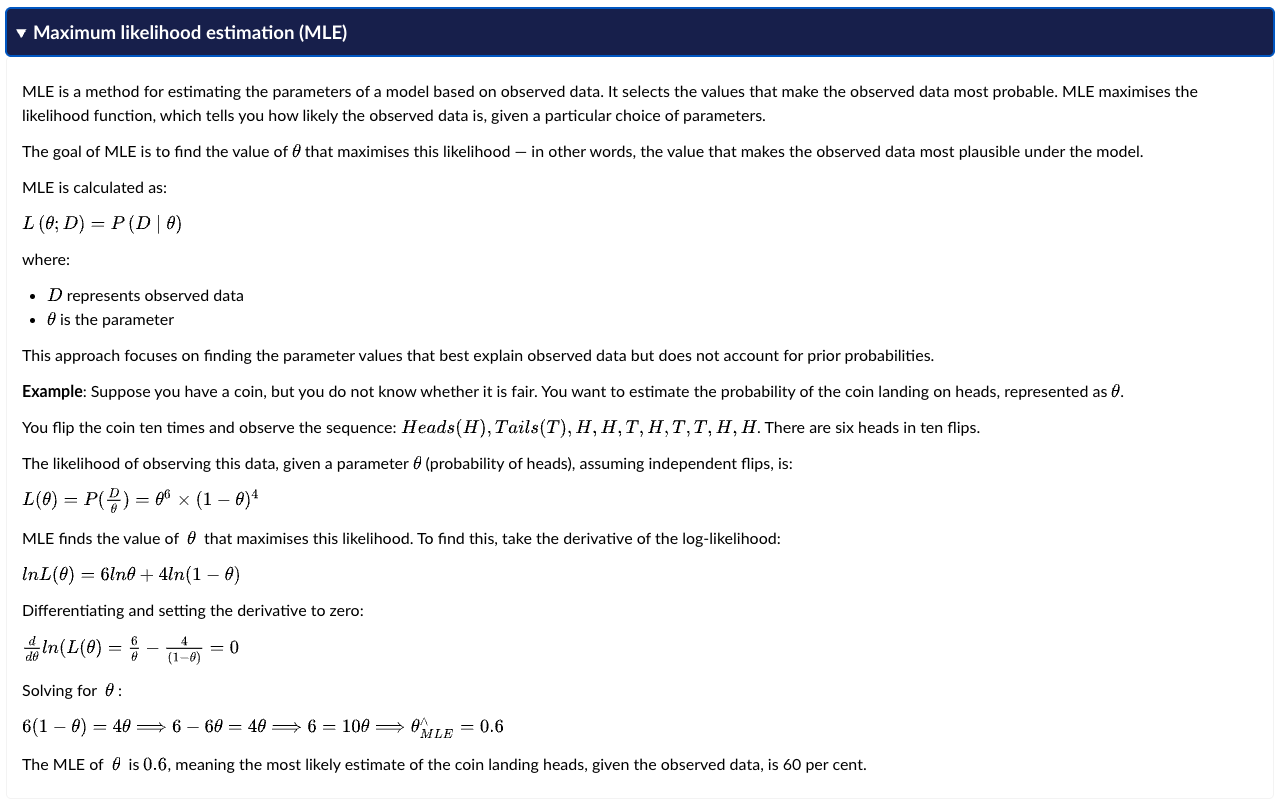

## 2.5 Comparison of Approaches

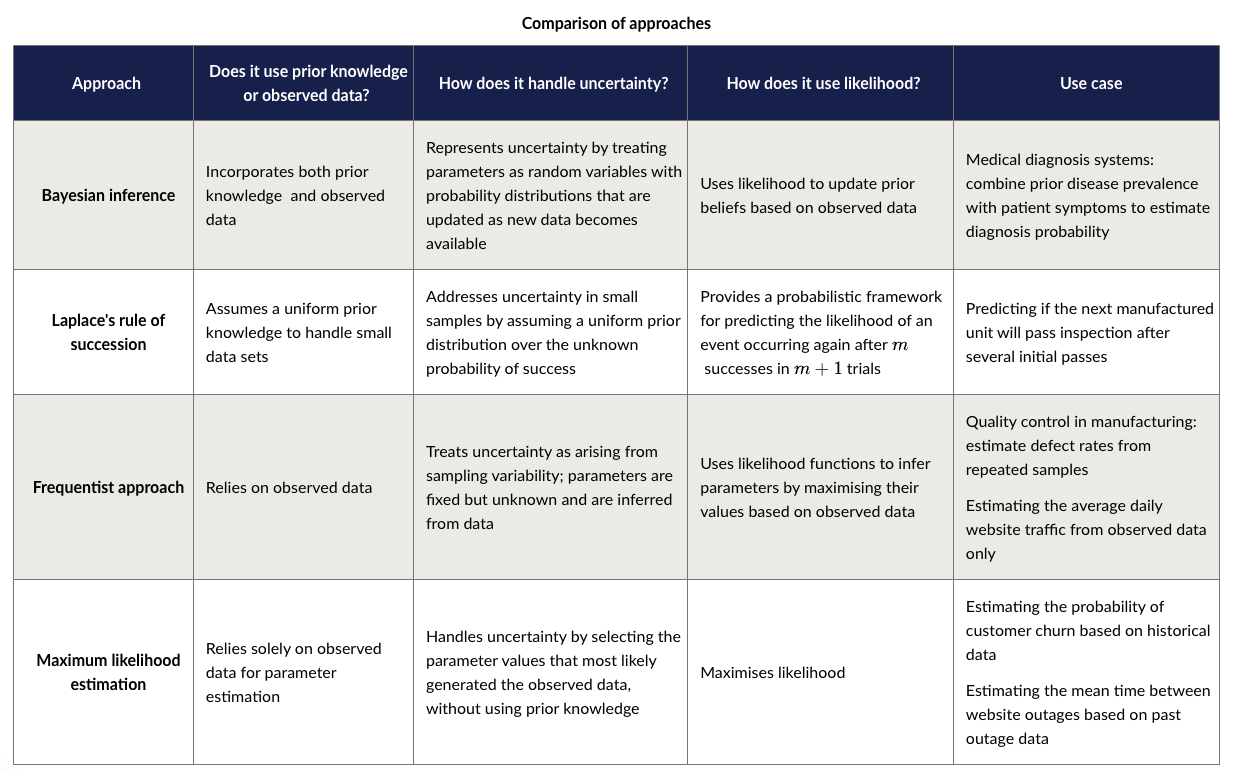

# Self Study 5.1 - Applying probabilistic approaches in ML


There are different approaches to probability in ML.

In this activity, you will focus on the following:

- Frequentist approach

- Maximum likelihood estimation

- Bayesian approach

- Laplace's rule of succession

In [ ]:
import numpy as np
from math import comb
from scipy.stats import binom
import matplotlib.pyplot as plt

## Frequentist Approach

## Frequentist approach

The frequentist approach to statistics interprets probability as the long-run frequency of events in repeated experiments. It focuses on making inferences based solely on observed data, without incorporating prior beliefs or subjective probabilities. Key methods include hypothesis testing, confidence intervals and parameter estimation.

The key expression in the frequentist approach is the likelihood function:

$$
L(\theta; x) = P(x \mid \theta)
$$





### **Question 1**:
You throw a coin five times and obtain five heads ($X_1 = 1, \ X_2 = 1, \ldots, X_5 = 1$). What is $\theta := \mathbb{P}[\text{heads}]$?

Fill in the ellipses with appropriate values.

In [ ]:
s = 5 #Number of successes
n = 5 #Number of trials
theta_hat = s / n #Number of successes 's' divided by number of trials 'n'
print(f"Number of Successes divided by number of trials (%): {theta_hat}")

Number of Successes divided by number of trials (%): 1.0


### **Question 2**:

If the truth is $\theta = 0.9$, what is the probability that you will see five heads in a row? Interpret the result.

HINT: The probability of heads = $\theta^s$, where *s* is the number of heads. Fill in the ellipses with appropriate values.


In [ ]:
#Define the true probability of heads
theta = 0.9

#Number of consecutive heads required
n_heads = 5

#Calculate the probability of observing five heads in a row
prob_5_heads = theta**n_heads

#Print the result
print(f"True probability of heads (θ): {theta}")
print(f"Probability of observing {n_heads} consecutive heads: {prob_5_heads:.5f}")

True probability of heads (θ): 0.9
Probability of observing 5 consecutive heads: 0.59049


## Maximum likelihood estimation

Goal: Find the parameter 𝜃 (e.g. the probability of heads for a coin) that maximises the likelihood of observing the data you have.


Given:
$X_1 = 1, X_2 = 1, \ldots, X_5 = 1$, which means all five coin tosses resulted in heads.



You have: $$L(x; \theta) = p(X_1 = 1, \ X_2 = 1, \ldots, X_5 = 1 | \theta) = \prod \theta^5  $$
Hence, the $\theta$ that maximises the likelihood is $\theta = 1$.

### **Question 3:**
For a coin with $\mathbb{P}[\text{head}] = \theta$, what is the probability of having $s$ heads out of $n$ (independent) flips? (Recall the binomial distribution.) Compute this value for $n=10$, $s = 3$, $\theta = 0.6$.

#### Answer
$ \mathbb{P}[\sum_{i=1}^n X_i] = \displaystyle{n \choose{s}} \theta^s (1- \theta)^{n-s} $

HINT: For the mathematical formula that uses combinations, the use  `comb(n,s)` function.

Fill in the ellipses to compute the likelihood.

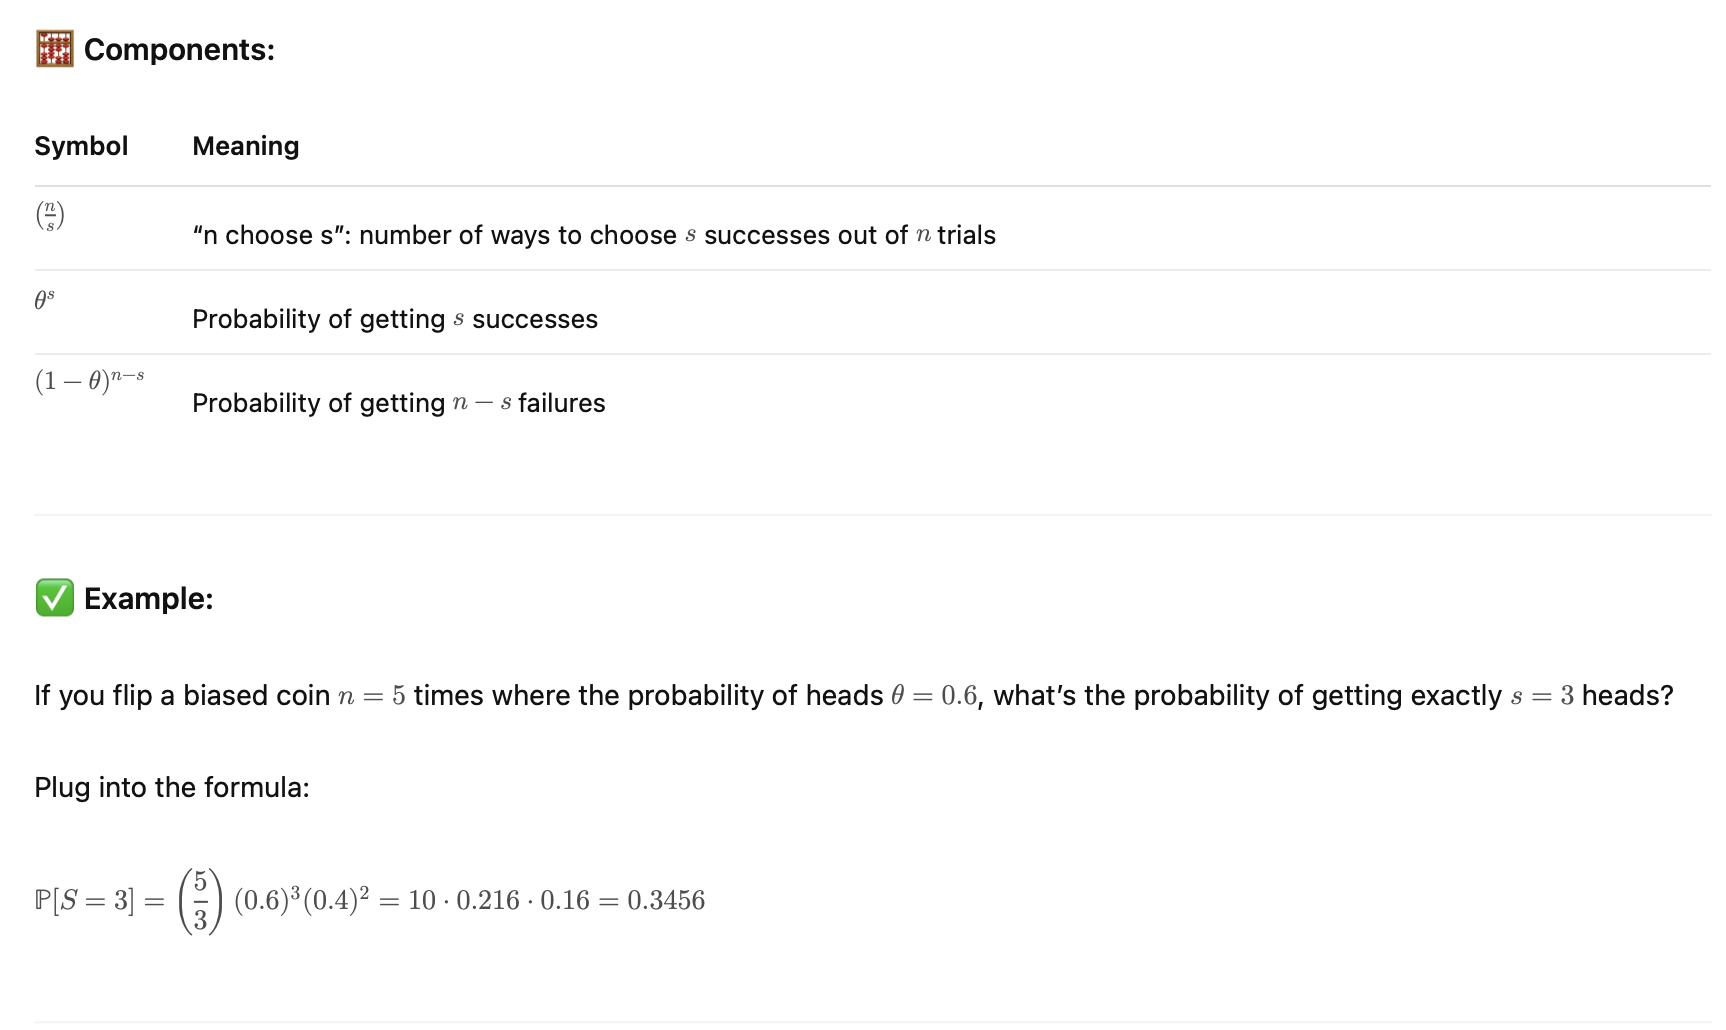

In [ ]:
#Computed using the manual function of the binomial formula
n = 10
s = 3
theta = 0.6
likelihood = comb(n,s)*(theta**s)*((1-theta)**(n-s))
print(round(likelihood,4))

0.0425


The selected code calculates the likelihood of observing a specific number of heads in a series of independent coin flips, given a certain probability of heads for each flip. This is based on the binomial distribution formula.

Here's a breakdown:

- __n__: Represents the total number of coin flips (trials).

- __s__: Represents the number of successful outcomes (heads) observed.

- __theta__: Represents the assumed probability of getting a head on a single flip.

- __comb(n, s)__: This function from the math module calculates the number of combinations, which is the number of ways to choose s successes out of n trials without regard to the order. This is the $\binom{n}{s}$$\binom{n}{s}$ part of the binomial formula.

- __(theta**s)__: This calculates the probability of getting s successes, given the probability theta for each success.

- __((1-theta)**(n-s))__: This calculates the probability of getting n-s failures, given the probability 1-theta for each failure.

- __likelihood__: This variable stores the result of the binomial probability formula, which is the likelihood of observing s heads in n flips with a probability of heads theta.

- __print(round(likelihood,4))__: This line prints the calculated likelihood, rounded to four decimal places.

In essence, this code is computing the probability of a specific outcome (3 heads in 10 flips with a 0.6 probability of heads) according to the binomial distribution, which is a key concept in understanding likelihood in the frequentist approach.

In [ ]:
#Computed using the inbuilt SciPy function
round(binom.pmf(s, n, theta),4)

np.float64(0.0425)

## Bayesian approach
Given that you have $s$ heads in total, out of $n$ flips, you would like to find a probability distribution for $\theta \in [0,1]$, denoted $f(\theta)$.

The major philosophy is to assume that $f(\theta)$ is proportional to the likelihood of data under $\theta$; that is, if a $\theta$ value obtains a likelihood that is greater than or equal to the likelihood of $\theta'$, then $f(\theta)$ should be greater than or equal to $f(\theta)$. You should thus have:
$$f(\theta) \propto  \displaystyle{n \choose{s}} \theta^s (1- \theta)^{n-s}$$
where $\propto$ denotes 'proportional to', so there exists some constant $C$ that does not depend on $\theta$ so that:
$$f(\theta)  =  \displaystyle C \cdot {n \choose{s}} \theta^s (1- \theta)^{n-s}$$

Simplifying this using basic linear algebra, the value of $f(\theta)$ is given by:
$$f(\theta) = (n+1) {n \choose s} \theta^s (1-\theta)^{n-s} $$

**Plotting $f(\theta)$ for the sequences:**
- Three heads out of three flips
- Five heads out of five flips
- Nine heads out of ten flips
- Two heads out of ten flips

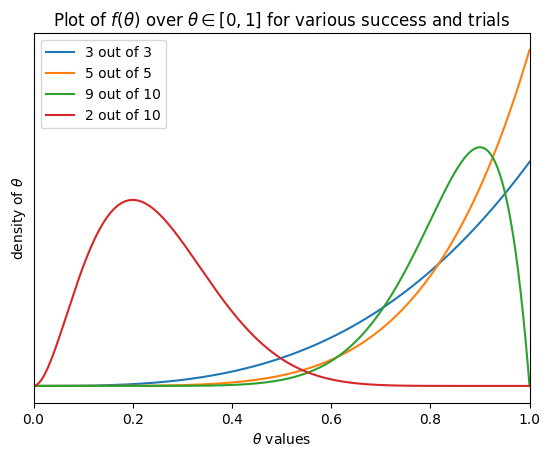

In [ ]:
def density_theta(n, s, theta):
    return (n + 1) * comb(n, s) * (theta**s) * ((1 - theta)**(n - s))

divide = 1000

thetas = np.linspace(0, 1, divide)

#1
C1 = np.array(list(map(lambda t: density_theta(3, 3, t), thetas)))

#2
C2 = np.array(list(map(lambda t: density_theta(5, 5, t), thetas)))

#3
C3 = np.array(list(map(lambda t: density_theta(10, 9, t), thetas)))

#4
C4 = np.array(list(map(lambda t: density_theta(10, 2, t), thetas)))


plt.plot(thetas, C1, label='3 out of 3')
plt.plot(thetas, C2, label='5 out of 5')
plt.plot(thetas, C3, label='9 out of 10')
plt.plot(thetas, C4, label='2 out of 10')
plt.yticks([])

plt.xlabel(r'$\theta$ values')
plt.ylabel(r'density of $\theta$')
plt.title(r"Plot of $f(\theta)$ over $\theta \in [0,1]$ for various success and trials")
plt.xlim([0,1])
plt.legend()
plt.show()



1.   Remeber, __Theta__ is the probability of success. a theta of 1 means 100% success
2.   density if theta represents the __posterior probability__. As a reminder posterior probability is a central concept in Bayesian statistics and represents your __updated belief__ about the probability of an event given new evidence

3. __High Density of Theta__: A high density of theta at a particular value means that, given the data we've observed, that value of theta is very likely to be the true probability of success. In the plot, the peaks of the curves represent the areas of highest density. For example, in the "9 out of 10" case, the density is highest around theta = 0.9, which means that the most likely value for the probability of success is 0.9.
Low Density of Theta:
4. __A low density of theta__ at a particular value means that, given the data we've observed, that value of theta is very unlikely to be the true probability of success. In the plot, the parts of the curves that are close to the x-axis represent the areas of lowest density. For example, in the "9 out of 10" case, the density is very low for theta values less than 0.5, which means that it's very unlikely that the true probability of success is less than 0.5.



Given $f(\theta)$ as you derived above, if you see $s$ heads out of $n$ trials, what is the probability that you will have a head in the next ($n+1$-th) flip? By the law of total probability, you have:
\begin{align}\mathbb{P}[\text{Head on $n+1$-th flip} \ | \ \text{$s$ heads out of $n$ flips previously}] & =  
\int_{x \in [0,1]} \mathbb{P}[\text{Heads} \ | \ \theta] \cdot f(\theta) \mathrm{d} \theta \\
& = \int_{x \in [0,1]} \theta \cdot f(\theta) \mathrm{d} \theta \\
& = \mathbb{E}[\theta] = \color{red}{\dfrac{s+1}{n+2}}
\end{align}

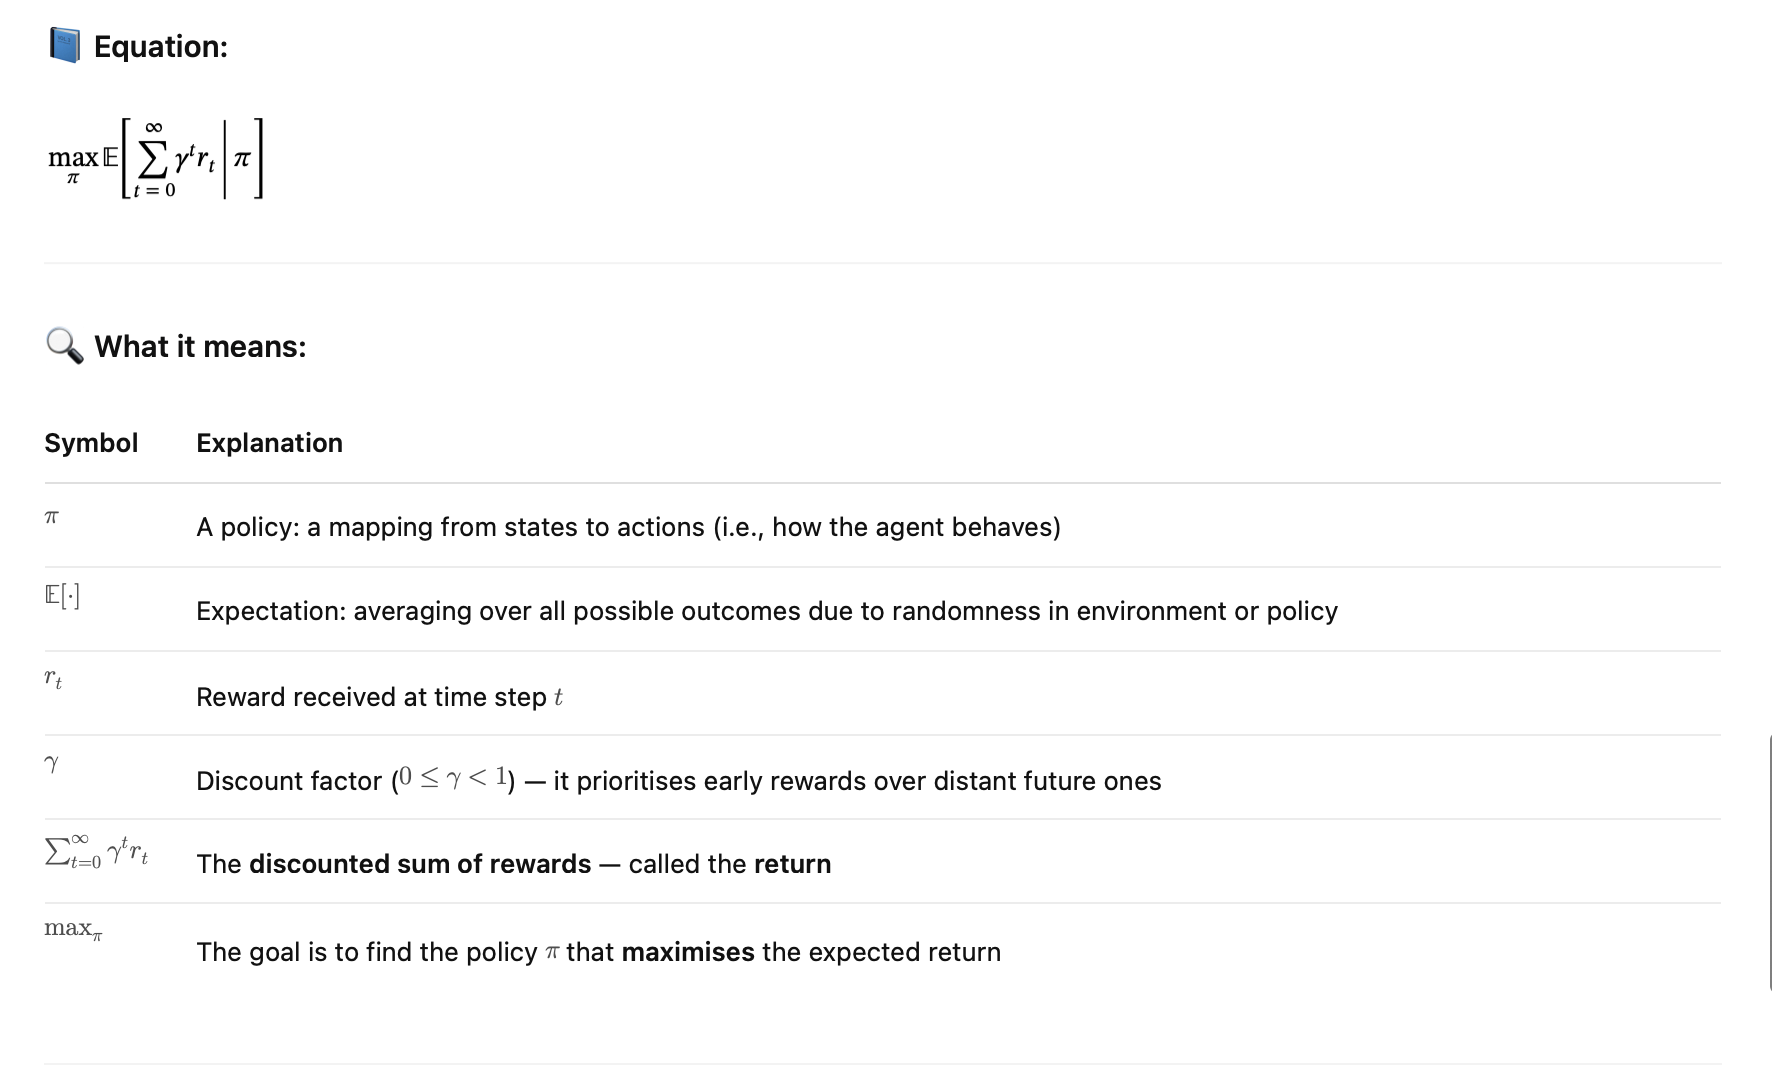

# 3 The Stochastic Perspective

## 3.1 Noiseless Classificatio Relationship (Realisability)



A noiseless classification relationship, also known as realisability, is a scenario in machine learning where it is possible to find a hypothesis (a model) that perfectly classifies all the data in the training set.

In other words, there is no noise or overlap in the data, and there is a clear boundary that can separate the different classes.

Here's a simple example:

Imagine you have a dataset of cats and dogs, and you want to classify them based on their weight. If all the cats weigh less than 10 pounds and all the dogs weigh more than 10 pounds, then there is a noiseless classification relationship. You can easily draw a line at 10 pounds that perfectly separates the two classes.

However, in the real world, this is rarely the case. There will always be some noise or overlap in the data (e.g., some cats might weigh more than 10 pounds, and some dogs might weigh less). In these cases, the classification relationship is not noiseless, and it is not possible to find a perfect classifier.

Imagine you have two types of objects, let's say blue balls and red balls. You want to separate them by drawing a line. In our example, the blue balls are all in the bottom-left corner of a box, and the red balls are all in the top-right corner. It's very easy to draw a straight line that separates the blue balls from the red balls. This is a "noiseless classification relationship" because there are no balls in the wrong place, and it's very easy to separate them.

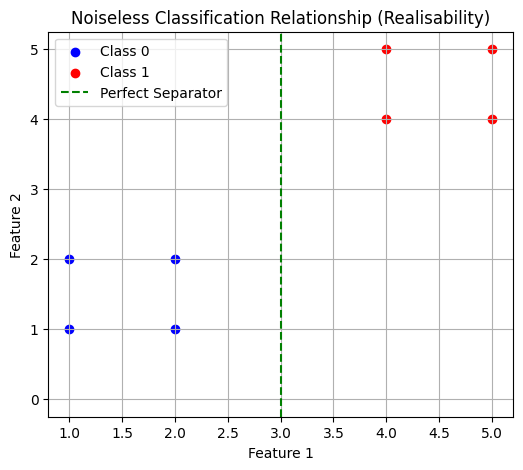

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple, linearly separable dataset
# Class 0
X0 = np.array([[1, 1], [1, 2], [2, 1], [2, 2]])
y0 = np.zeros(X0.shape[0])

# Class 1
X1 = np.array([[4, 4], [4, 5], [5, 4], [5, 5]])
y1 = np.ones(X1.shape[0])

# Combine the data
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Plot the data
plt.figure(figsize=(6, 5))
plt.scatter(X0[:, 0], X0[:, 1], color='blue', label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')

# Draw a perfect separating line (our hypothesis)
plt.axline((3, 0), (3, 1), color='green', linestyle='--', label='Perfect Separator')

plt.title('Noiseless Classification Relationship (Realisability)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### Explanation of the Code

This code demonstrates the concept of a **noiseless classification relationship** (or realisability).

1.  **Generate Data**: We create two small sets of 2D data points, `X0` and `X1`, representing two different classes (Class 0 and Class 1). These points are chosen specifically so that they can be perfectly separated.

2.  **Combine Data**: The two sets of points are combined into a single dataset `X` with corresponding labels `y`.

3.  **Plot Data**: We use `matplotlib` to create a scatter plot of the data points. Class 0 is shown in blue, and Class 1 is shown in red.

4.  **Show Perfect Separator**: The green dashed line is a "perfect separator" or a "hypothesis" that can perfectly distinguish between the two classes. All the blue points are on one side of the line, and all the red points are on the other.

Because such a perfect separator exists, we can say that this dataset has a **noiseless classification relationship**. In a real-world scenario, this would mean that a machine learning model could achieve 100% accuracy on this training data.

## 3.2 Finite Hypothesis Space

Imagine you're trying to guess a secret number between 1 and 10. You have a limited number of possible guesses (1, 2, 3, 4, 5, 6, 7, 8, 9, 10). This limited set of guesses is like a __"finite hypothesis space"__. It's a fancy way of saying that you only have a certain number of possible answers to choose from.

In machine learning, a "hypothesis" is just a possible model or rule that the computer can learn. A "finite hypothesis space" means that the computer only has a limited number of models to choose from. This makes the learning process easier because the computer doesn't have to search through an infinite number of possibilities.

In [ ]:
import numpy as np

# Generate a simple 1D dataset
X = np.array([1, 2, 4, 6, 7])
y = np.array([0, 0, 1, 1, 1])

# Define our finite hypothesis space
def hypothesis1(x):
  return 0 if x < 3 else 1

def hypothesis2(x):
  return 0 if x < 5 else 1

hypotheses = [hypothesis1, hypothesis2]

# Find the best hypothesis
best_hypothesis = None
min_error = float('inf')

for h in hypotheses:
  predictions = np.array([h(x) for x in X])
  error = np.sum(predictions != y)
  print(f"Error for {h.__name__}: {error}")
  if error < min_error:
    min_error = error
    best_hypothesis = h

print(f"\nBest hypothesis is: {best_hypothesis.__name__}")

Error for hypothesis1: 0
Error for hypothesis2: 1

Best hypothesis is: hypothesis1



What are the implications of having an infinite hypothesis space? How does this make the learning problem more challenging?

**Hint:** Think about the trade-off between model complexity and the risk of overfitting.

An infinite hypothesis space has several important implications for machine learning, making the learning problem more challenging in a number of ways:

*   **Increased Risk of Overfitting**: With an infinite number of possible models to choose from, it becomes much easier to find a model that fits the training data perfectly, including any noise or random fluctuations. This can lead to **overfitting**, where the model performs very well on the training data but fails to generalize to new, unseen data.

*   **Need for More Complex Learning Algorithms**: With a finite hypothesis space, it is theoretically possible to search through all the possible models to find the best one. However, with an infinite hypothesis space, this is not possible. We need to use more complex and sophisticated learning algorithms, such as gradient descent, to search for the best model in a more efficient way.

*   **Need for More Data**: The more complex the model, the more data is needed to train it effectively and to avoid overfitting. With an infinite hypothesis space, we typically need a large amount of data to ensure that the learned model will generalize well to new data.

*   **Need for Regularization**: **Regularization** is a set of techniques used to prevent overfitting by adding a penalty to the loss function for more complex models. This encourages the learning algorithm to choose a simpler model that is more likely to generalize well to new data. Common regularization techniques include L1 and L2 regularization.

In summary, while an infinite hypothesis space provides the flexibility to learn very complex models, it also introduces significant challenges related to overfitting, the need for more data, and the need for more advanced learning algorithms and regularization techniques.

## 4 Bounds

n the context of this notebook, a generalization bound is a mathematical statement that provides a guarantee on how well a machine learning model will perform on new, unseen data. It's a way of quantifying the model's ability to generalize from the training data to the real world.

Here's a breakdown of the key ideas:

- The Goal of Machine Learning: The ultimate goal of machine learning is not just to build a model that performs well on the training data, but to build a model that performs well on new, unseen data. This is known as generalization.

- The Problem of Overfitting: As we've discussed, there's always a risk of overfitting, where the model learns the training data too well, including the noise, and fails to generalize to new data.
i
- The Role of the Generalization Bound: A generalization bound  provides a way to control the risk of overfitting. It gives us a theoretical upper bound on the error that the model will make on new data. This bound typically depends on three things:

- - The complexity of the hypothesis space: The more complex the hypothesis space, the more likely the model is to overfit, and the worse the generalization bound will be.
- - The amount of training data: The more training data we have, the less likely the model is to overfit, and the better the generalization bound will be.
- - The training error: The lower the error on the training data, the better the generalization bound will be.

- The PAC Framework: The concept of a generalization bound is a key part of the PAC (Probably Approximately Correct) learning framework. The PAC framework provides a formal way to reason about the trade-off between the complexity of the hypothesis space, the amount of training data, and the generalization error of the learned model.

In summary, a generalization bound is a powerful theoretical tool that allows us to understand the conditions under which a machine learning model will generalize well to new data. It provides a way to reason about the trade-off between model complexity and the amount of data required for learning, and it gives us confidence that our learned model will perform well in the real world.

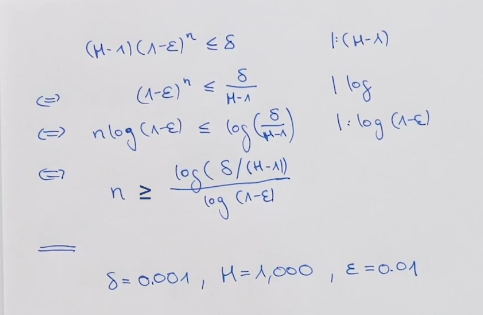

# Data Splitting Strategies

Data splitting strategies are essential for building and evaluating machine learning models. They allow us to assess how well our model will generalize to new, unseen data. Here are the most common strategies:

### 1. Train-Test Split

This is the simplest data splitting strategy. We split our data into two sets:

*   **Training Set**: This is the data that we use to train our model. The model learns the underlying patterns and relationships from this data.
*   **Test Set**: This is the data that we use to evaluate our model after it has been trained. We use the test set to get an unbiased estimate of how well our model will perform on new, unseen data.

A common split is 80% for training and 20% for testing, but this can vary depending on the size of the dataset.

### 2. Train-Validation-Test Split

This is a more robust strategy that is used when we need to tune the hyperparameters of our model. We split our data into three sets:

*   **Training Set**: This is used to train the model, just like in the train-test split.
*   **Validation Set**: This is used to tune the hyperparameters of the model. Hyperparameters are the settings of the model that are not learned from the data, such as the learning rate in a neural network or the depth of a decision tree. We try different combinations of hyperparameters and see which ones perform best on the validation set.
*   **Test Set**: This is used to get a final, unbiased estimate of the model's performance after we have chosen the best hyperparameters.

A common split is 60% for training, 20% for validation, and 20% for testing.

### 3. Cross-Validation

This is a more advanced technique that is used when we have a limited amount of data. We split our data into a number of "folds" (e.g., 5 or 10). We then train our model on all but one of the folds and test it on the remaining fold. We repeat this process until every fold has been used as the test set.

Cross-validation provides a more reliable estimate of the model's performance than a single train-test split, but it is also more computationally expensive.

The choice of which data splitting strategy to use depends on the size of the dataset, the complexity of the model, and the goals of the analysis.

# ASSIGNMENT 5.1

### Step 1 - split the data into training, testing, validation.

In [ ]:
#import the necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Example: generate synthetic data (replace with your own X, y)
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze()**3 - 2 * X.squeeze()**2 + X.squeeze() + 5 + np.random.randn(100) * 100

In [ ]:
# Split the data into training/validation and test sets (80% train/val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training/validation set into training and validation sets (75% train, 25% val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (60, 1)
Shape of X_val: (20, 1)
Shape of X_test: (20, 1)
Shape of y_train: (60,)
Shape of y_val: (20,)
Shape of y_test: (20,)


### Step 2 - Fit each model separately on the training dataset

In [ ]:
###GRADED CELL
val_errors = {}
models = {}

for degree in range(1, 7):

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_val_poly)

    val_error = mean_squared_error(y_val, y_pred)

    val_errors[degree] = val_error
    models[degree] = (model, poly)

print(val_errors)

{1: 161492.22004382376, 2: 7467.7522325981845, 3: 8567.48416891074, 4: 8117.443867094946, 5: 8036.56146966211, 6: 8060.761069171337}


The selected code is performing a search for the best hyperparameter (in this case, the polynomial degree) for a regression model. It does this by training several models with different degrees and then evaluating them on a separate validation dataset to see which one performs best.

Here's a detailed breakdown of the process:

1.  **Initialization**:
    *   `val_errors = {}`: An empty dictionary is created to store the validation error (a measure of how bad the model's predictions are) for each polynomial degree.
    *   `models = {}`: An empty dictionary to store the trained model for each degree, so we can use the best one later.

2.  **Looping Through Degrees**:
    *   `for degree in range(1, 7):`: The code loops through degrees 1 through 6. For each degree, it will build and test a separate model.

3.  **Creating Polynomial Features**:
    *   `poly = PolynomialFeatures(degree=degree)`: This creates an object that can transform our single feature (like `x`) into multiple features (like `x`, `x²`, `x³`, etc., up to the specified `degree`).
    *   `X_train_poly = poly.fit_transform(X_train)`: This transforms the training data into polynomial features.
    *   `X_val_poly = poly.transform(X_val)`: This applies the *same* transformation to the validation data.

4.  **Training the Model**:
    *   `model = LinearRegression()`: An instance of a standard linear regression model is created.
    *   `model.fit(X_train_poly, y_train)`: The model is trained. It learns the best linear relationship between the newly created polynomial features (`X_train_poly`) and the target values (`y_train`).

5.  **Evaluating the Model**:
    *   `y_pred = model.predict(X_val_poly)`: The trained model makes predictions on the validation data.
    *   `val_error = mean_squared_error(y_val, y_pred)`: The code calculates the Mean Squared Error (MSE), which is a common way to measure the error for regression models. It compares the model's predictions (`y_pred`) to the actual correct values (`y_val`).

6.  **Storing the Results**:
    *   `val_errors[degree] = val_error`: The calculated validation error is stored in the dictionary, with the degree as the key.
    *   `models[degree] = (model, poly)`: The trained model and the polynomial transformer are stored for later use.

7.  **Final Output**:
    *   `print(val_errors)`: After the loop finishes, this line prints the dictionary of validation errors. By looking at these errors, we can determine which degree resulted in the lowest error and is therefore the best model for this problem.

### Question 3 - Evaluate each model separately on the validation dataset.

Evaluate on the validation set and use the __mean_squared_error()__ to compute the error

- As a reminder the __mean squared error__ is the common way to measure the average squared difference between predicted and actual values in a model. We square it to remove any negative signs.


In [ ]:
### GRADED
# Get the best degree from the validation errors
best_degree = min(val_errors, key=val_errors.get)

# Get the best model and polynomial features
best_model, best_poly = models[best_degree]

# Transform the validation data using the best polynomial features
X_val_poly = best_poly.transform(X_val)

# Make predictions on the validation data
y_val_pred = best_model.predict(X_val_poly)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_val_pred)

print(f"Best Degree: {best_degree}")
print(f"Validation MSE for best degree: {mse:.2f}")

Best Degree: 2
Validation MSE for best degree: 7467.75


#### Step 4: Choose the model that performs best on the validation set.

#### **Question 4**: Choose the best model which has the min error and print the degree of that model.

HINT: Use `key=val_errors.get` to use the dictionary values (the validation errors) for comparison, and not the keys themselves.

In [ ]:
###GRADED

best_degree = None

# YOUR CODE HERE
best_degree = min(val_errors, key=val_errors.get)

print(f"Best polynomial degree: {best_degree}")


Best polynomial degree: 2


test below -----------------------------

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the default wine dataset
data = load_wine()
X = data.data
y = data.target

# Split data into train (60%), validation (20%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)
# Note: 0.25 * 0.80 = 0.20 → gives a 60:20:20 split

# Fit the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate the validation set
val_preds = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the test set
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, test_preds, target_names=data.target_names))

Validation Accuracy: 0.9444
Test Accuracy: 0.9722

Classification Report on Test Set:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
